<a href="https://colab.research.google.com/github/monicayyt/teacherPSI/blob/main/Time_Series_Plotting_of_Weather_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Plotting of Weather Data from NetCDF
 ---
 Step 1: Load Required Libraries

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt

Step 2: Open the NetCDF File

In [ ]:
# Replace with your own file path if needed
ds = xr.open_dataset("data/met/bnfmetM1.b1.20250406.000000.cdf")

Step 3: Explore the Dataset

In [ ]:
ds

<xarray.Dataset> Size: 340kB
Dimensions:                       (time: 1440, bound: 2)
Coordinates:
  * time                          (time) datetime64[ns] 12kB 2025-04-06 ... 2...
Dimensions without coordinates: bound
Data variables: (12/51)
    base_time                     datetime64[ns] 8B ...
    time_offset                   (time) datetime64[ns] 12kB ...
    time_bounds                   (time, bound) datetime64[ns] 23kB ...
    atmos_pressure                (time) float32 6kB ...
    qc_atmos_pressure             (time) int32 6kB ...
    temp_mean                     (time) float32 6kB ...
    ...                            ...
    qc_logger_volt                (time) int32 6kB ...
    logger_temp                   (time) float32 6kB ...
    qc_logger_temp                (time) int32 6kB ...
    lat                           float32 4B ...
    lon                           float32 4B ...
    alt                           float32 4B ...
Attributes: (12/22)
    command_line:                met_ingest -s bnf -f M1 --max-runtime 0
    Conventions:                 ARM-1.3
    process_version:             ingest-met-4.56-0.el9
    dod_version:                 met-b1-7.6
    input_source:                /data/collection/bnf/bnfmetM1.00/M1_MET_Tabl...
    site_id:                     bnf
    ...                          ...
    averaging_interval_comment:  The time assigned to each data point indicat...
    tbrg:                        Tipping Bucket Rain Gauge
    wind_speed_offset:           0.000000
    wind_speed_slope:            0.098000
    tbrg_precip_corr_info:       0.001000 * tbrg_precip_total^2 + 0.883000 * ...
    history:                     created by user armflowprod on machine prod-...

This displays metadata and all available variables. For example:

| Variable          | Unit | Description                                |
| ----------------- | ---- | ------------------------------------------ |
| `temp_mean`       | °C   | Mean air temperature at measurement height |
| `atmos_pressure`  | hPa  | Surface atmospheric pressure               |
| `rh_mean`         | %    | Mean relative humidity                     |
| `wspd_arith_mean` | m/s  | Arithmetic mean of wind speed              |



Step 4: Extract Variables for Plotting

In [ ]:
time = ds['time']
time_offset = ds['time_offset']
temperature = ds['temp_mean']
pressure = ds['atmos_pressure']
humidity = ds['rh_mean']
wind_speed = ds['wspd_arith_mean']

Step 5: Create Time Series Plots

a. Plot "temperature"

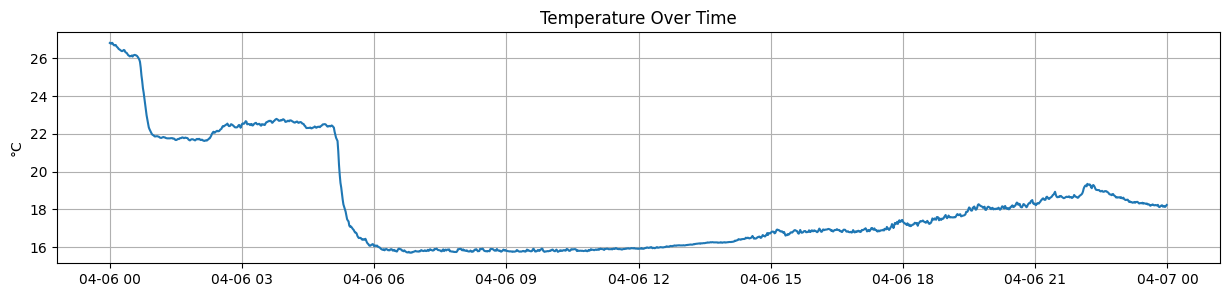

In [ ]:
plt.figure(figsize=(15, 3))

plt.plot(time, temperature)
plt.ylabel('°C')
plt.title('Temperature Over Time')
plt.grid(True)

b. Plot multiple time series plots

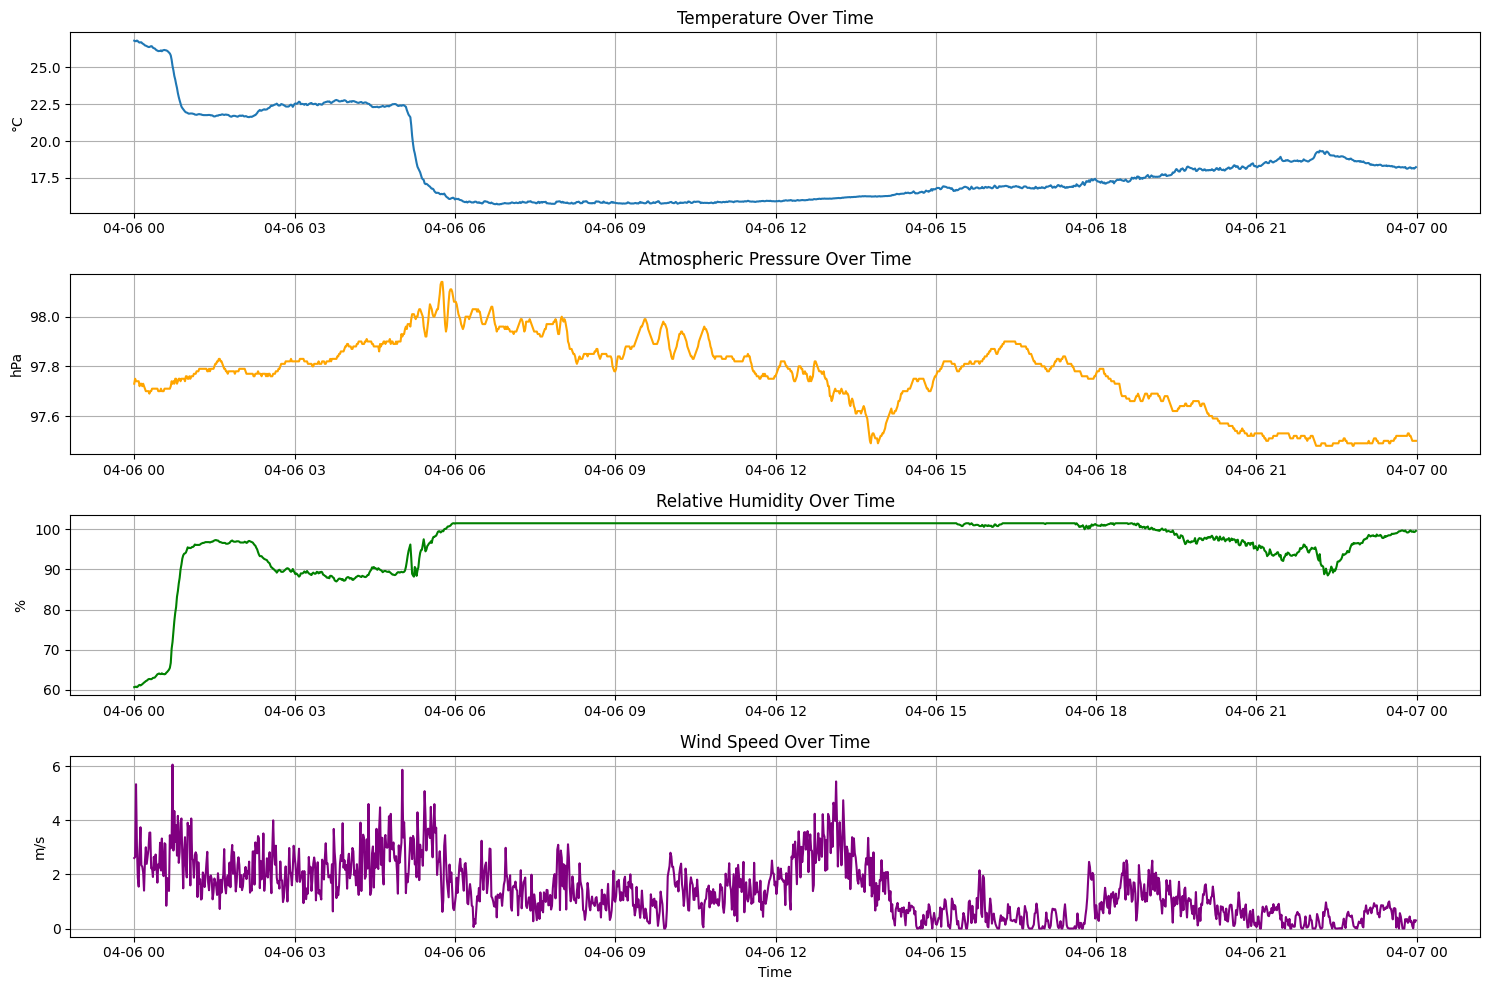

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.plot(time, temperature)
plt.ylabel('°C')
plt.title('Temperature Over Time')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(time, pressure, color='orange')
plt.ylabel('hPa')
plt.title('Atmospheric Pressure Over Time')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(time, humidity, color='green')
plt.ylabel('%')
plt.title('Relative Humidity Over Time')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(time, wind_speed, color='purple')
plt.ylabel('m/s')
plt.xlabel('Time')
plt.title('Wind Speed Over Time')
plt.grid(True)

plt.tight_layout()
plt.show()

c. Plot temperature from nearby supplyment sites

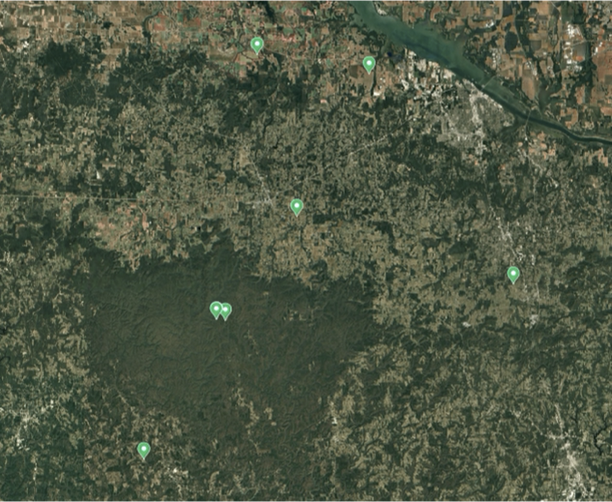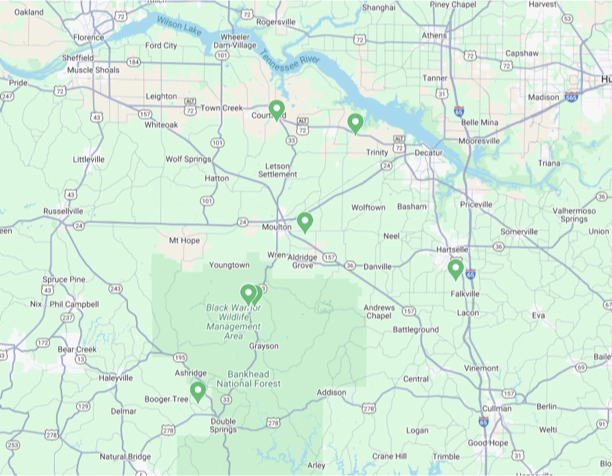



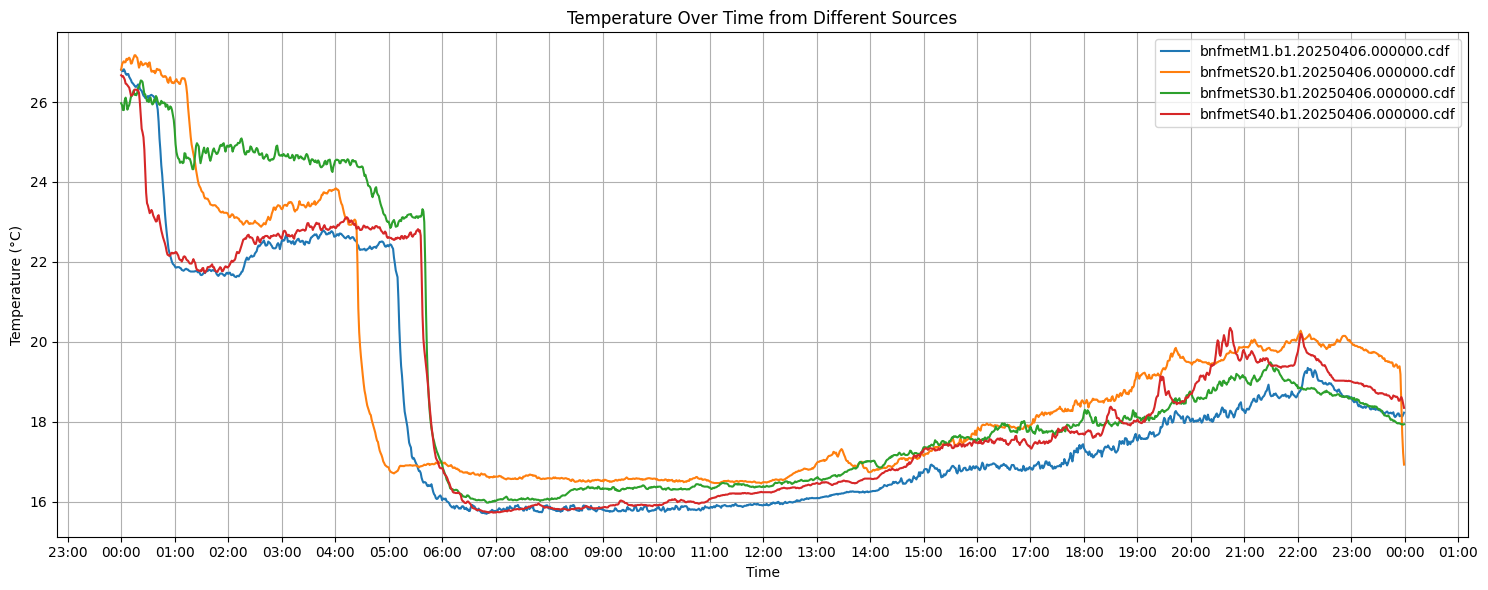

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# List of file paths
file_paths = [
    "data/met/bnfmetM1.b1.20250406.000000.cdf",
    "data/met/bnfmetS20.b1.20250406.000000.cdf",
    "data/met/bnfmetS30.b1.20250406.000000.cdf",
    "data/met/bnfmetS40.b1.20250406.000000.cdf"
]

plt.figure(figsize=(15, 6))

# Loop through each file and plot the temperature
for file_path in file_paths:
    # Open the dataset
    ds = xr.open_dataset(file_path)

    # Extract time and temperature
    time = ds['time']
    temperature = ds['temp_mean']

    # Plot the temperature
    # Use the filename as the label for the legend
    plt.plot(time, temperature, label=file_path.split('/')[-1])

# Add labels, title, grid, and legend
plt.ylabel('Temperature (°C)')
plt.xlabel('Time')
plt.title('Temperature Over Time from Different Sites')
plt.grid(True)
plt.legend()

# Format the x-axis to show hours
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.HourLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.tight_layout()
plt.show()